In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from keras import Sequential
from keras.layers import Dense



In [29]:
data = pd.read_csv('./student_version.csv')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             734 non-null    int64  
 1   Sex             734 non-null    object 
 2   ChestPainType   734 non-null    object 
 3   RestingBP       734 non-null    int64  
 4   Cholesterol     734 non-null    int64  
 5   FastingBS       734 non-null    int64  
 6   RestingECG      734 non-null    object 
 7   MaxHR           734 non-null    int64  
 8   ExerciseAngina  734 non-null    object 
 9   Oldpeak         734 non-null    float64
 10  ST_Slope        734 non-null    object 
 11  HeartDisease    734 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 68.9+ KB


In [30]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,42,M,NAP,120,240,1,Normal,194,N,0.8,Down,0
1,36,M,NAP,130,209,0,Normal,178,N,0.0,Up,0
2,56,M,ASY,150,213,1,Normal,125,Y,1.0,Flat,1
3,37,F,NAP,130,211,0,Normal,142,N,0.0,Up,0
4,51,M,ASY,120,0,1,Normal,104,N,0.0,Flat,1


In [31]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000
mean,53.651226,133.064033,199.683924,0.227520,136.178474,0.905041,0.546322
std,9.364290,18.438941,108.216855,0.419517,25.329254,1.082952,0.498189
min,29.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,177.000000,0.000000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,269.000000,0.000000,155.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [32]:
data.loc[data['Cholesterol'] < 5,:]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
4,51,M,ASY,120,0,1,Normal,104,N,0.0,Flat,1
6,52,M,ASY,165,0,1,Normal,122,Y,1.0,Up,1
10,60,M,ASY,160,0,1,Normal,149,N,0.4,Flat,1
11,45,M,NAP,110,0,0,Normal,138,N,-0.1,Up,0
14,57,M,ASY,128,0,1,ST,148,Y,1.0,Flat,1
...,...,...,...,...,...,...,...,...,...,...,...,...
718,63,M,ASY,185,0,0,Normal,98,Y,0.0,Up,1
720,61,M,ASY,134,0,1,ST,86,N,1.5,Flat,1
721,60,M,NAP,115,0,1,Normal,143,N,2.4,Up,1
723,55,M,NAP,120,0,0,ST,125,Y,2.5,Flat,1


In [33]:
data.duplicated().sum()

0

In [34]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

categorical_features = X.select_dtypes(include="object").columns.tolist()
numerical_features = X.select_dtypes(exclude="object").columns.tolist()

classes = y.unique()
print(y.value_counts())
print(classes)

for feature in numerical_features:
    if len(X[feature].unique()) < 8:
        categorical_features.append(feature)
        numerical_features.remove(feature)

print(numerical_features,len(numerical_features))
print(categorical_features,len(categorical_features))

HeartDisease
1    401
0    333
Name: count, dtype: int64
[0 1]
['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak'] 5
['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'FastingBS'] 6


In [35]:
categorical_unique_values = []
for feature in categorical_features:
    categorical_unique_values.append(data[feature].unique().tolist())
categorical_unique_values

[['M', 'F'],
 ['NAP', 'ASY', 'TA', 'ATA'],
 ['Normal', 'LVH', 'ST'],
 ['N', 'Y'],
 ['Down', 'Up', 'Flat'],
 [1, 0]]

In [36]:
for feature in categorical_features:
    print(X[feature].value_counts())

Sex
M    568
F    166
Name: count, dtype: int64
ChestPainType
ASY    401
NAP    162
ATA    139
TA      32
Name: count, dtype: int64
RestingECG
Normal    444
LVH       149
ST        141
Name: count, dtype: int64
ExerciseAngina
N    431
Y    303
Name: count, dtype: int64
ST_Slope
Flat    379
Up      307
Down     48
Name: count, dtype: int64
FastingBS
0    567
1    167
Name: count, dtype: int64


In [37]:
for feature in numerical_features:
    print(X[feature].value_counts())

Age
54    45
58    36
55    36
57    31
62    30
52    29
61    28
59    28
60    27
51    27
53    26
48    24
56    22
41    21
63    20
46    20
43    19
49    19
50    19
42    17
65    16
64    15
47    15
45    15
38    14
44    12
66    12
69    11
67    10
39     9
37     9
68     9
35     9
40     7
70     7
36     6
34     5
71     5
74     5
72     4
75     3
29     3
33     2
32     2
77     2
31     2
76     1
Name: count, dtype: int64
RestingBP
120    104
130     92
140     88
110     47
150     44
160     43
125     21
128     17
132     15
135     15
138     15
115     15
145     14
180     12
112     12
122     11
100     11
136     11
124     11
170     11
134     10
142      9
105      7
155      7
126      6
118      6
144      6
152      5
139      5
158      4
108      4
131      4
133      4
200      3
137      3
146      3
154      3
102      3
178      3
156      2
114      2
94       2
141      2
95       2
172      2
148      2
104      2
123      2
190      

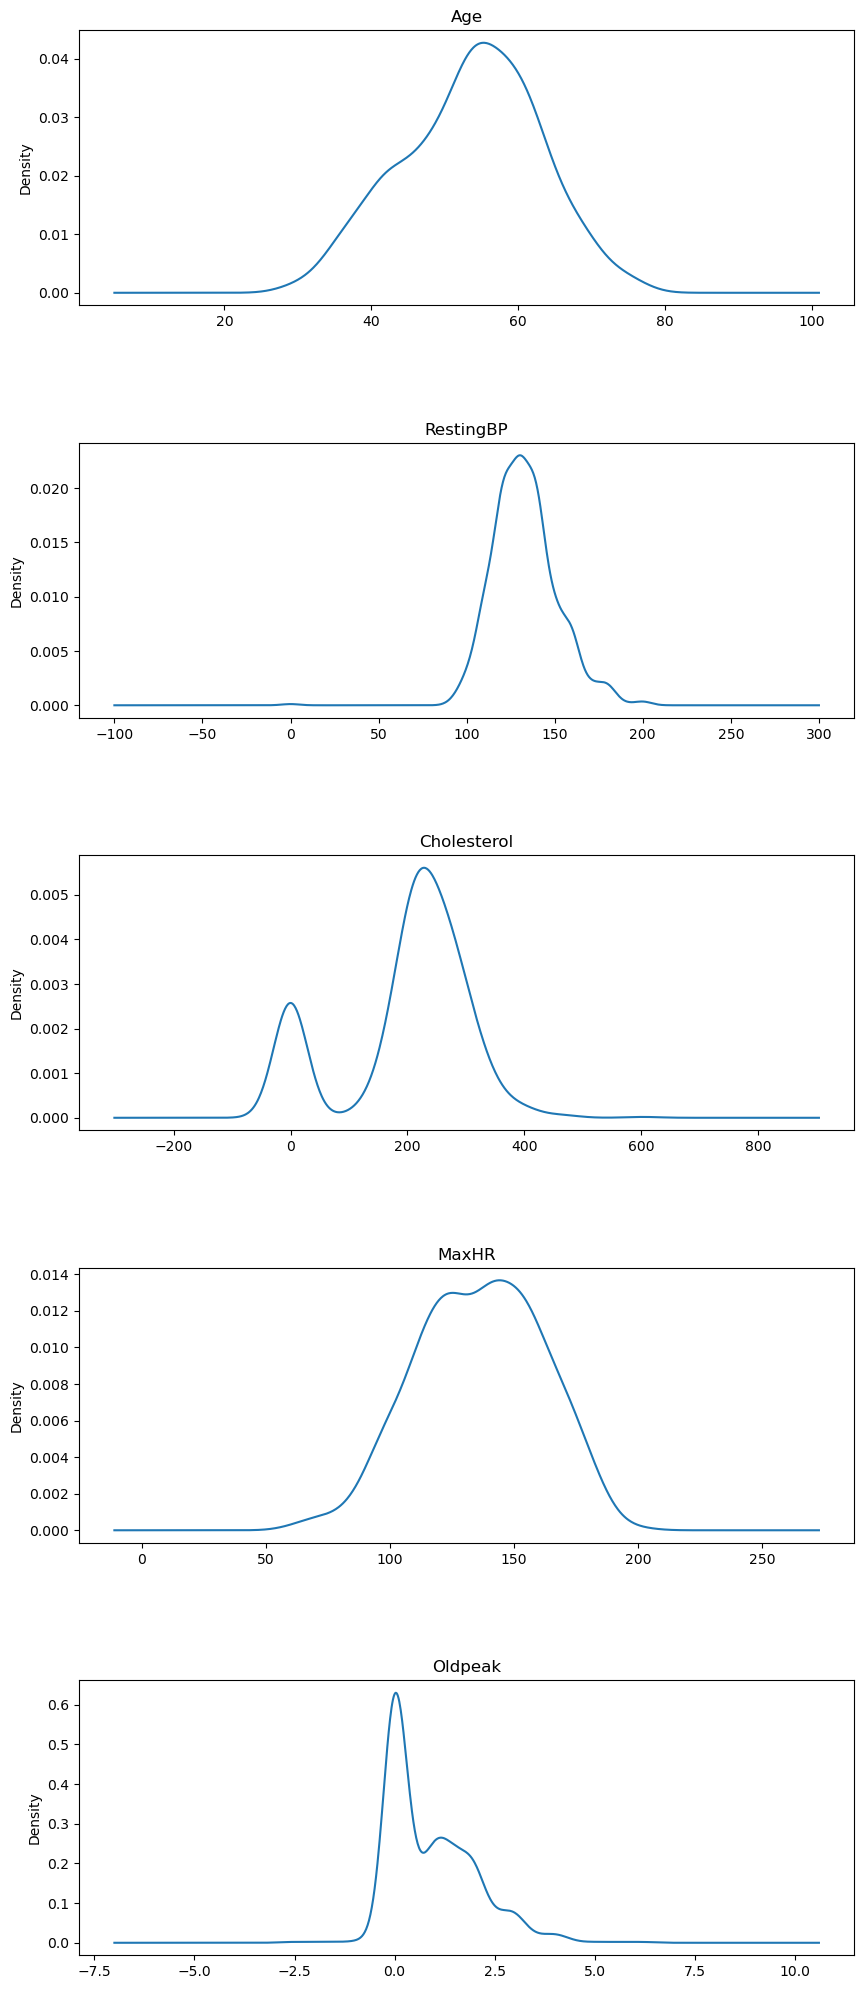

In [38]:
fig, ax =  plt.subplots(len(numerical_features), figsize=(10, len(numerical_features) * 5))

for index in range(len(numerical_features)):
    ax[index].set_title(numerical_features[index])
    ax[index].set_ylabel('count')
    X[numerical_features[index]].plot(kind="kde",ax=ax[index])
    

plt.subplots_adjust(hspace=0.5)
plt.show()

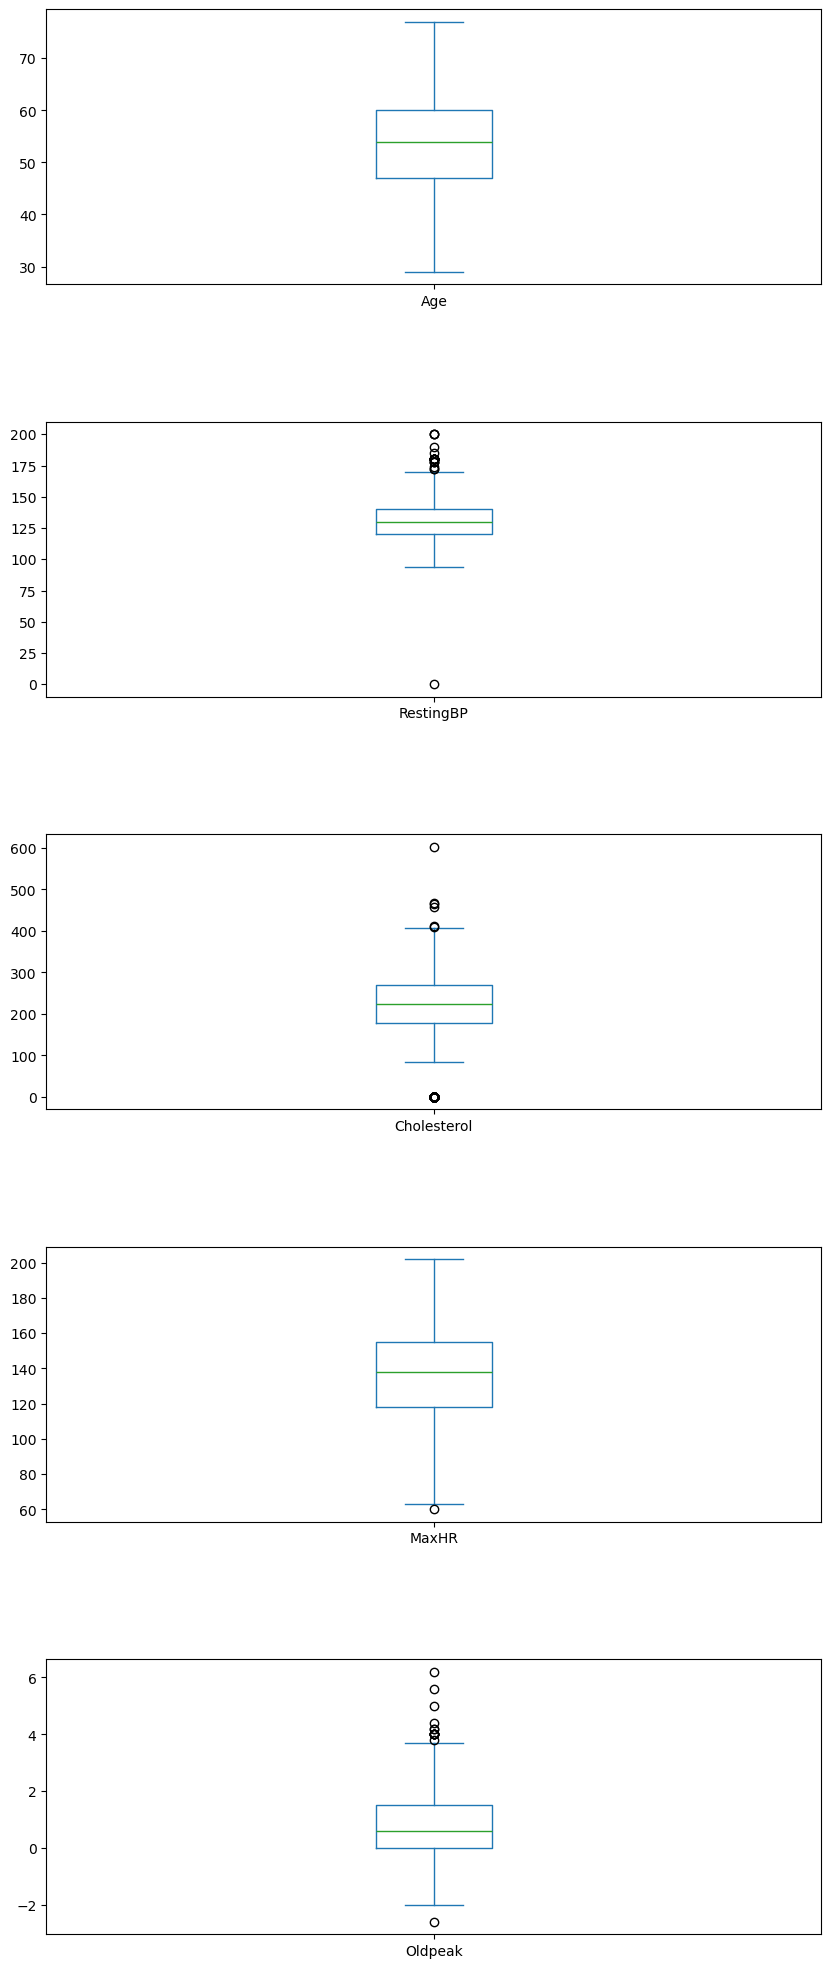

In [39]:

fig, ax =  plt.subplots(len(numerical_features), figsize=(10, len(numerical_features) * 5))

for index in range(len(numerical_features)):
    X[numerical_features[index]].plot(kind="box",ax=ax[index])
    

plt.subplots_adjust(hspace=0.5)
plt.show()

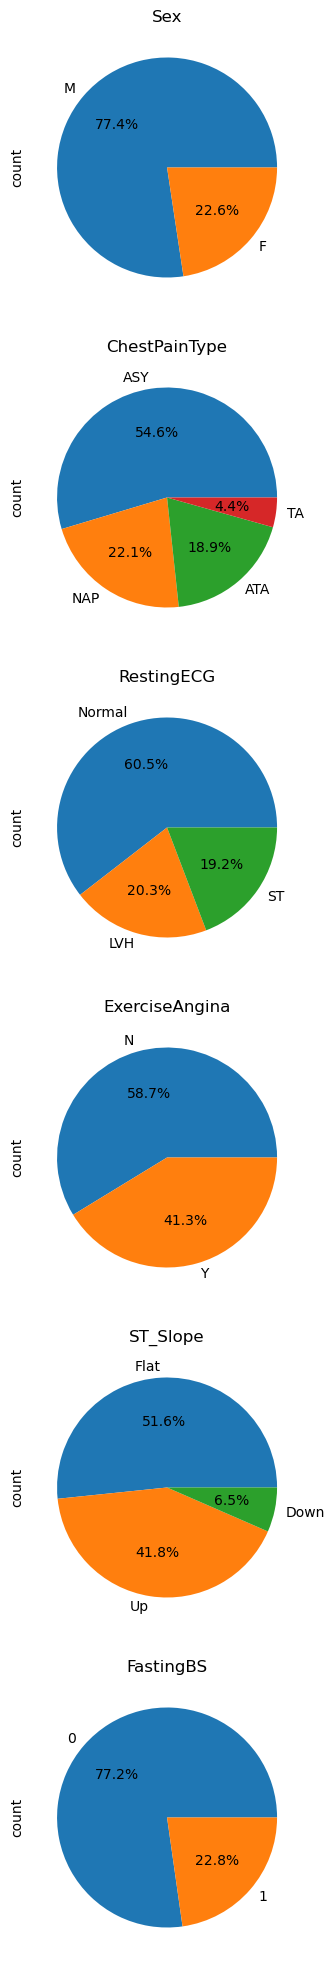

In [40]:
fig, ax = plt.subplots(len(categorical_features), figsize=(10, len(numerical_features) * 5))

for index in range(len(categorical_features)):
    values = X[categorical_features[index]].value_counts()
    values.plot(kind="pie",autopct='%1.1f%%', ax=ax[index])
    ax[index].set_title(categorical_features[index])


plt.show()


In [41]:
# def handling_outliers(df, numerical_features):

for feature in numerical_features:
    q1 = X[feature].quantile(0.25)
    q3 = X[feature].quantile(0.75)
    IQR = q3-q1
    lower_bound = q1 - 0.5 * IQR
    upper_bound = q3 + 0.5 * IQR
    
    mean_value = X[feature].mean()
    X.loc[(X[feature] < lower_bound) | (X[feature] > upper_bound), feature] = mean_value
    print(lower_bound, upper_bound)



40.5 66.5
110.0 150.0
131.0 315.0
99.5 173.5
-0.75 2.25


C:\Users\omarm\AppData\Local\Temp\ipykernel_33732\2261668223.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '53.65122615803815' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X.loc[(X[feature] < lower_bound) | (X[feature] > upper_bound), feature] = mean_value
C:\Users\omarm\AppData\Local\Temp\ipykernel_33732\2261668223.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '133.06403269754767' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X.loc[(X[feature] < lower_bound) | (X[feature] > upper_bound), feature] = mean_value
C:\Users\omarm\AppData\Local\Temp\ipykernel_33732\2261668223.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '199.68392370572207' ha

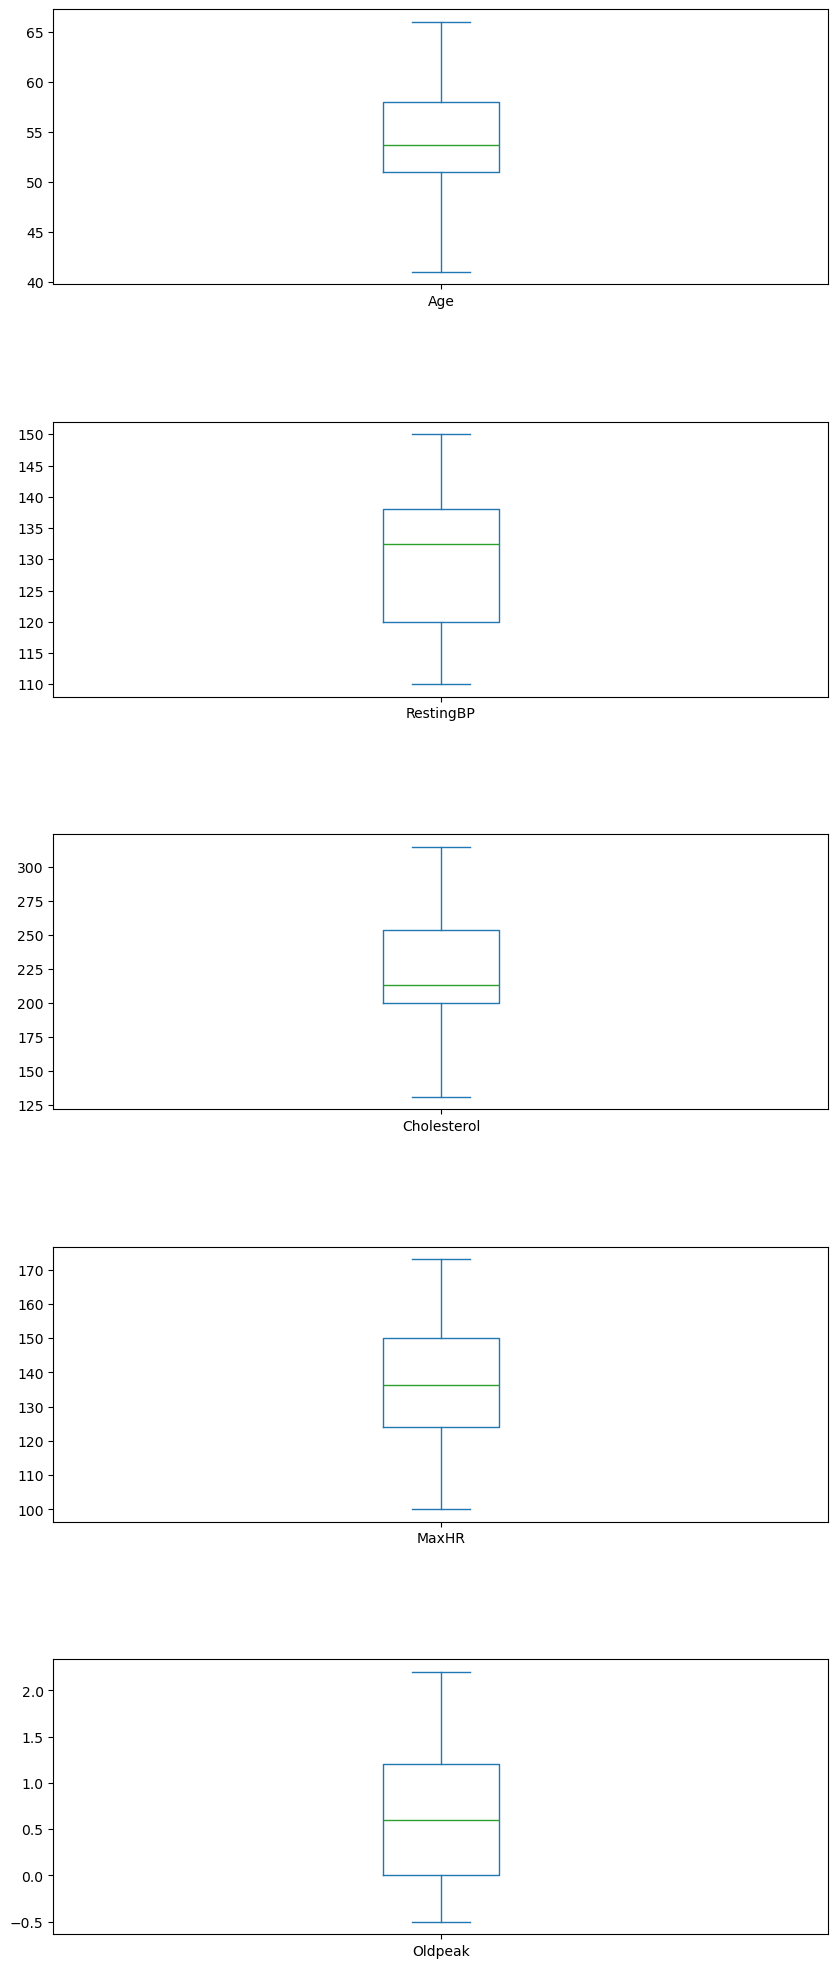

In [42]:

fig, ax =  plt.subplots(len(numerical_features), figsize=(10, len(numerical_features) * 5))

for index in range(len(numerical_features)):
    X[numerical_features[index]].plot(kind="box",ax=ax[index])
    

plt.subplots_adjust(hspace=0.5)
plt.show()

In [43]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num",StandardScaler(),numerical_features),
        ("cat",OneHotEncoder(),categorical_features)
    ]
)
test_size = 0.25
random_state = 42
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=test_size,random_state=random_state)

x_train_scaled = preprocessor.fit_transform(x_train)
x_test_scaled = preprocessor.transform(x_test)

In [44]:
neighbors = 5

KNN_model = KNeighborsClassifier(n_neighbors=neighbors, metric="minkowski", p=2)
KNN_model.fit(x_train_scaled,y_train)

KNeighborsClassifier()

In [45]:
y_predict_KNN = KNN_model.predict(x_test_scaled)
y_predict_KNN

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

0.8858695652173914


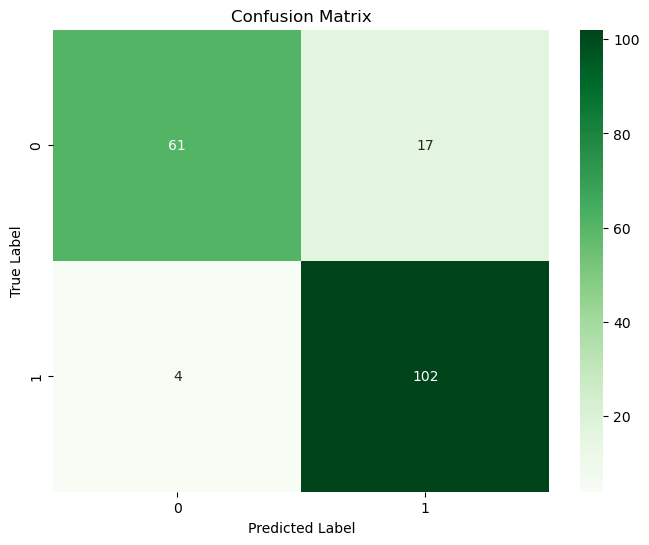

              precision    recall  f1-score   support

           0       0.94      0.78      0.85        78
           1       0.86      0.96      0.91       106

    accuracy                           0.89       184
   macro avg       0.90      0.87      0.88       184
weighted avg       0.89      0.89      0.88       184



In [46]:
accuracy_KNN = accuracy_score(y_test,y_predict_KNN)
print(accuracy_KNN)

matrix_KNN = confusion_matrix(y_test,y_predict_KNN)
plt.figure(figsize=(8, 6))
sns.heatmap(matrix_KNN, annot=True, fmt='d', cmap='Greens', 
            xticklabels = classes,  
            yticklabels = classes)  

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_test,y_predict_KNN))

In [47]:
logistic_model = LogisticRegression()
logistic_model.fit(x_train_scaled,y_train)

LogisticRegression()

In [48]:
y_predict_logistic = logistic_model.predict(x_test_scaled)
y_predict_logistic

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

0.8967391304347826


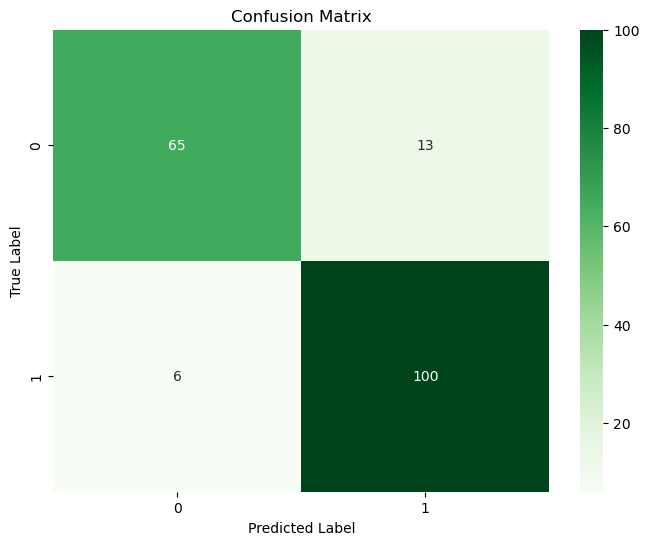

              precision    recall  f1-score   support

           0       0.92      0.83      0.87        78
           1       0.88      0.94      0.91       106

    accuracy                           0.90       184
   macro avg       0.90      0.89      0.89       184
weighted avg       0.90      0.90      0.90       184



In [49]:
accuracy_logistic = accuracy_score(y_test,y_predict_logistic)
print(accuracy_logistic)

matrix_logistic = confusion_matrix(y_test,y_predict_logistic)
plt.figure(figsize=(8, 6))
sns.heatmap(matrix_logistic, annot=True, fmt='d', cmap='Greens', 
            xticklabels = classes,  
            yticklabels = classes)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_test,y_predict_logistic))

In [50]:
model_keras = Sequential([
    Dense(16,activation='relu'),
    Dense(8,activation='relu'),
    Dense(1,activation='sigmoid')
])

In [51]:
model_keras.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model_keras.fit(x_train_scaled,y_train,epochs=10,batch_size=1)

Epoch 1/10
550/550 ━━━━━━━━━━━━━━━━━━━━ 2s 831us/step - accuracy: 0.5632 - loss: 0.6791
Epoch 2/10
550/550 ━━━━━━━━━━━━━━━━━━━━ 0s 848us/step - accuracy: 0.8362 - loss: 0.4397
Epoch 3/10
550/550 ━━━━━━━━━━━━━━━━━━━━ 0s 837us/step - accuracy: 0.8781 - loss: 0.3496
Epoch 4/10
550/550 ━━━━━━━━━━━━━━━━━━━━ 0s 799us/step - accuracy: 0.8598 - loss: 0.3490
Epoch 5/10
550/550 ━━━━━━━━━━━━━━━━━━━━ 0s 787us/step - accuracy: 0.8527 - loss: 0.3421
Epoch 6/10
550/550 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step - accuracy: 0.8532 - loss: 0.3551
Epoch 7/10
550/550 ━━━━━━━━━━━━━━━━━━━━ 0s 798us/step - accuracy: 0.8667 - loss: 0.3157
Epoch 8/10
550/550 ━━━━━━━━━━━━━━━━━━━━ 0s 783us/step - accuracy: 0.8526 - loss: 0.3293
Epoch 9/10
550/550 ━━━━━━━━━━━━━━━━━━━━ 0s 768us/step - accuracy: 0.8791 - loss: 0.3039
Epoch 10/10
550/550 ━━━━━━━━━━━━━━━━━━━━ 0s 813us/step - accuracy: 0.8748 - loss: 0.2876


In [52]:
y_predict_keras = model_keras.predict(x_test_scaled)
threshold = 0.5
y_predict_keras = np.where(y_predict_keras < threshold,0,1)
y_predict_keras

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
    

0.8913043478260869


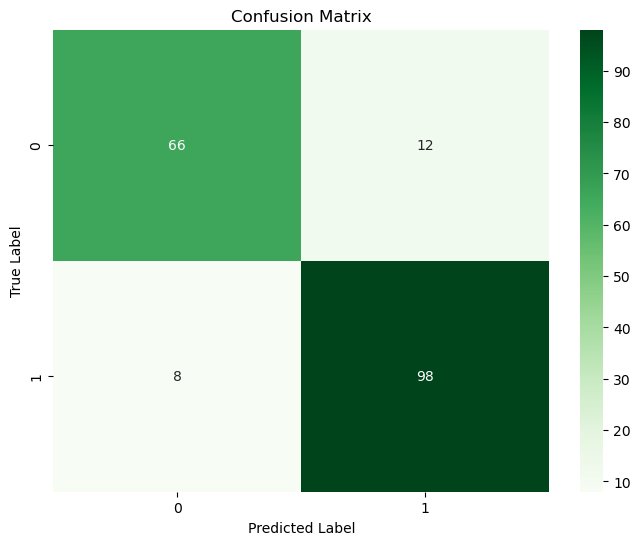

              precision    recall  f1-score   support

           0       0.89      0.85      0.87        78
           1       0.89      0.92      0.91       106

    accuracy                           0.89       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184



In [53]:
accuracy_keras = accuracy_score(y_test,y_predict_keras)
print(accuracy_keras)

matrix_keras = confusion_matrix(y_test,y_predict_keras)
plt.figure(figsize=(8, 6))
sns.heatmap(matrix_keras, annot=True, fmt='d', cmap='Greens', 
            xticklabels = classes,  
            yticklabels = classes)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_test,y_predict_keras))

In [59]:
kaggle_test = pd.read_csv('X_test.csv')
ids = kaggle_test.iloc[:,0]
kaggle_X_test = kaggle_test.iloc[:,1:]

In [60]:
kaggle_categorical_features = kaggle_X_test.select_dtypes(include="object").columns.tolist()
kaggle_numerical_features = kaggle_X_test.select_dtypes(exclude="object").columns.tolist()

for feature in numerical_features:
    if len(X[feature].unique()) < 8:
        kaggle_categorical_features.append(feature)
        kaggle_numerical_features.remove(feature)

In [61]:
kaggle_X_test_scaled = preprocessor.transform(kaggle_X_test)
kaggle_predicted = logistic_model.predict(kaggle_X_test_scaled)
kaggle_predicted

array([0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1], dtype=int64)

In [65]:
output_df = pd.DataFrame({
    'ID': ids,
    'HeartDisease': kaggle_predicted
})
output_df.to_csv('predicted.csv', index=False)